In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [236]:
#Get TMY data
from pyepw.epw import EPW

# Load the EPW file
epw = EPW()
epw.read('data/tmy3/G4802010.epw')

# Extract data into a DataFrame
tmy_data = {
    'Year': [record.year for record in epw.weatherdata],
    'Month': [record.month for record in epw.weatherdata],
    'Day': [record.day for record in epw.weatherdata],
    'Hour': [record.hour for record in epw.weatherdata],
    'Minute': [record.minute for record in epw.weatherdata],
    'Temperature': [record.dry_bulb_temperature for record in epw.weatherdata],
    'Dew Point Temperature': [record.dew_point_temperature for record in epw.weatherdata],
    'Relative Humidity': [record.relative_humidity for record in epw.weatherdata],
    'Atmospheric Pressure': [record.atmospheric_station_pressure for record in epw.weatherdata],
    'Wind Direction': [record.wind_direction for record in epw.weatherdata],
    'Wind Speed': [record.wind_speed for record in epw.weatherdata],
    'Total Sky Cover': [record.total_sky_cover for record in epw.weatherdata],
    'Opaque Sky Cover': [record.opaque_sky_cover for record in epw.weatherdata],
    'Global Horizontal Radiation': [record.global_horizontal_radiation for record in epw.weatherdata],
    'Direct Normal Radiation': [record.direct_normal_radiation for record in epw.weatherdata],
    'Diffuse Horizontal Radiation': [record.diffuse_horizontal_radiation for record in epw.weatherdata],
    'Global Horizontal Illuminance': [record.global_horizontal_illuminance for record in epw.weatherdata],
    'Direct Normal Illuminance': [record.direct_normal_illuminance for record in epw.weatherdata],
    'Diffuse Horizontal Illuminance': [record.diffuse_horizontal_illuminance for record in epw.weatherdata],
    'Zenith Luminance': [record.zenith_luminance for record in epw.weatherdata],
    'Snow Depth': [record.snow_depth for record in epw.weatherdata],
    'Precipitable Water': [record.precipitable_water for record in epw.weatherdata],
    'Aerosol Optical Depth': [record.aerosol_optical_depth for record in epw.weatherdata],
    'Albedo': [record.albedo for record in epw.weatherdata],
    'Liquid Precipitation Depth': [record.liquid_precipitation_depth for record in epw.weatherdata],
    'Liquid Precipitation Quantity': [record.liquid_precipitation_quantity for record in epw.weatherdata]
}

df_tmy = pd.DataFrame(tmy_data)[["Month","Day","Hour","Temperature","Dew Point Temperature", "Relative Humidity","Wind Speed"]]
df_tmy


,Month,Day,Hour,Temperature,Dew Point Temperature,Relative Humidity,Wind Speed
0,1,1,1,2.8,1.7,93,0.0
1,1,1,2,2.8,1.7,93,0.0
2,1,1,3,2.2,1.7,96,0.0
3,1,1,4,1.7,0.6,92,0.0
4,1,1,5,1.7,1.1,96,0.0
...,...,...,...,...,...,...,...
8755,12,31,20,11.1,3.9,61,2.6
8756,12,31,21,9.4,3.9,69,0.0
8757,12,31,22,7.2,3.9,80,0.0
8758,12,31,23,6.7,3.3,80,0.0


Total energy required to cool to 20°C: 7710.83 kWh
Total energy required to cool to 22°C: 5376.40 kWh
Total energy savings with a 2°C setback: 2334.43 kWh
Total energy savings as a percentage: 17.8%


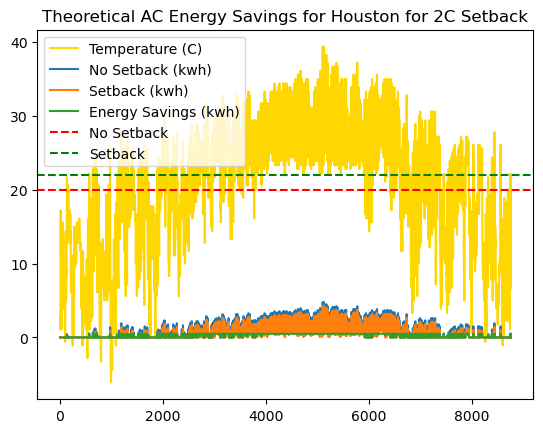

In [352]:
## Theoretical analysis based on temperature
# Constants
target_temperature = 20  # Target temperature in degrees Celsius
setback_temperature = target_temperature + 2  # Setback temperature
specific_heat_capacity_air = 1005  # J/(kg·K)
density_of_air = 1.225  # kg/m³
air_flow_rate = 0.2  # m³/s (single value used)

# Calculate the temperature difference without setback
df_ac = df_tmy[["Temperature"]].copy()
df_ac['temp_delta'] = (df_ac['Temperature'] - target_temperature).apply(lambda x: x if x > 0 else 0)

# Calculate the energy required without setback
df_ac['energy_kwh_no_setback'] = df_ac['temp_delta'] * specific_heat_capacity_air * density_of_air * air_flow_rate * 3600 / 3.6e6

# Calculate the temperature difference with setback
df_ac['temp_delta_setback'] = (df_ac['Temperature'] - setback_temperature).apply(lambda x: x if x > 0 else 0)

# Calculate the energy required per unit volume (J/m³) with setback
df_ac['energy_kwh_setback'] = df_ac['temp_delta_setback'] * specific_heat_capacity_air * density_of_air * air_flow_rate * 3600 / 3.6e6

# Calculate the energy savings
df_ac['energy_savings_kwh'] = df_ac['energy_kwh_no_setback'] - df_ac['energy_kwh_setback']


# Summarize the total energy required and savings
total_energy_no_setback = df_ac['energy_kwh_no_setback'].sum()
total_energy_setback = df_ac['energy_kwh_setback'].sum()
total_energy_savings = df_ac['energy_savings_kwh'].sum()

print(f'Total energy required to cool to {target_temperature}°C: {total_energy_no_setback:.2f} kWh')
print(f'Total energy required to cool to {setback_temperature}°C: {total_energy_setback:.2f} kWh')
print(f'Total energy savings with a {setback_temperature - target_temperature}°C setback: {total_energy_savings:.2f} kWh')
print(f'Total energy savings as a percentage: {total_energy_savings/(total_energy_setback+total_energy_no_setback)*100:.1f}%')

plt.title("Theoretical AC Energy Savings for Houston for 2C Setback")
plt.plot(df_ac["Temperature"],label="Temperature (C)",color="gold")
plt.plot(df_ac.energy_kwh_no_setback,label="No Setback (kwh)")
plt.plot(df_ac.energy_kwh_setback,label="Setback (kwh)")
plt.plot(df_ac.energy_savings_kwh,label="Energy Savings (kwh)")
plt.axhline(y=target_temperature, color='r', linestyle='--', label='No Setback')
plt.axhline(y=setback_temperature, color='g', linestyle='--', label='Setback')

plt.legend()

In [359]:
df_ac[1900:1910]


,Temperature,temp_delta,energy_kwh_no_setback,temp_delta_setback,energy_kwh_setback,energy_savings_kwh
1900,8.3,0.0,0.000000,0.0,0.000000,0.000000
1901,7.2,0.0,0.000000,0.0,0.000000,0.000000
1902,7.8,0.0,0.000000,0.0,0.000000,0.000000
1903,12.2,0.0,0.000000,0.0,0.000000,0.000000
1904,16.1,0.0,0.000000,0.0,0.000000,0.000000
1905,17.8,0.0,0.000000,0.0,0.000000,0.000000
1906,19.4,0.0,0.000000,0.0,0.000000,0.000000
1907,21.1,1.1,0.270848,0.0,0.000000,0.270848
1908,22.2,2.2,0.541695,0.2,0.049245,0.492450
1909,23.3,3.3,0.812543,1.3,0.320093,0.492450


In [362]:
#Import residential load profile data
# 7049055.484 homes
df_cool = pd.read_csv("up00-tx-single-family_detached.csv")[["timestamp", "cooling energy"]]
df_cool["cool_mwh"] = df_cool["cooling energy"] / 1000
df_cool["date"] = pd.to_datetime(df_cool.timestamp)
df_cool.drop(columns=['timestamp','cooling energy'], inplace=True)
df_cool

,cool_mwh,date
0,235.401718,2018-01-01 01:00:00
1,236.928900,2018-01-01 02:00:00
2,236.974062,2018-01-01 03:00:00
3,237.040922,2018-01-01 04:00:00
4,236.869861,2018-01-01 05:00:00
...,...,...
8755,126.815634,2018-12-31 20:00:00
8756,181.658189,2018-12-31 21:00:00
8757,236.189656,2018-12-31 22:00:00
8758,243.589158,2018-12-31 23:00:00


In [363]:
# Load the system load data
df_load = pd.read_excel("data/Native_Load_2018.xlsx")[["HourEnding", "ERCOT"]]

# Correct the "24:00" time value and increment the date
df_load['HourEnding'] = df_load['HourEnding'].str.replace(' 24:00', ' 00:00')
df_load['date'] = pd.to_datetime(df_load['HourEnding'].str.slice(0, 10))
df_load.loc[df_load['HourEnding'].str.endswith('00:00'), 'date'] += pd.Timedelta(days=1)

# Parse the date and set it as a new column
df_load['date'] = pd.to_datetime(df_load['date'].astype(str) + ' ' + df_load['HourEnding'].str.slice(11))

# Drop the now redundant columns
df_load.drop(columns=['HourEnding'], inplace=True)
df_load.head()

/Users/zaki/opt/anaconda3/lib/python3.9/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname DST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,ERCOT,date
0,50567.069682,2018-01-01 01:00:00
1,50617.087977,2018-01-01 02:00:00
2,50694.300087,2018-01-01 03:00:00
3,50999.591693,2018-01-01 04:00:00
4,51723.732017,2018-01-01 05:00:00


In [364]:
# Load the electricity price data
df_price_raw = pd.concat(pd.read_excel("data/rpt.00013060.0000000000000000.DAMLZHBSPP_2018.xlsx",sheet_name=None).values())

# Filter for the specific settlement point
df_price_raw = df_price_raw[df_price_raw["Settlement Point"] == "HB_HUBAVG"].reset_index(drop=True)

# Correct the "24:00" time value and increment the date
df_price_raw['Hour Ending'] = df_price_raw['Hour Ending'].str.replace('24:00', '00:00')
df_price_raw['Hour Ending Time'] = pd.to_datetime(df_price_raw['Hour Ending'].str.slice(0, 10))

# Convert 'Delivery Date' to datetime
df_price_raw['Delivery Date'] = pd.to_datetime(df_price_raw['Delivery Date'])

# Increment the 'Delivery Date' by one day where 'Hour Ending' is '00:00'
df_price_raw.loc[df_price_raw['Hour Ending'].str.endswith('00:00'), 'Delivery Date'] += pd.Timedelta(days=1)


# Parse the date and set it as a new column
df_price_raw['date'] = pd.to_datetime(df_price_raw['Delivery Date'].astype(str) + ' ' + df_price_raw['Hour Ending'])

# Drop unnecessary columns
df_price = df_price_raw.drop(columns=["Repeated Hour Flag", "Settlement Point", "Hour Ending", "Delivery Date", "Hour Ending Time"])

df_price

,Settlement Point Price,date
0,27.18,2018-01-01 01:00:00
1,25.52,2018-01-01 02:00:00
2,25.75,2018-01-01 03:00:00
3,26.76,2018-01-01 04:00:00
4,28.07,2018-01-01 05:00:00
...,...,...
8755,28.57,2018-12-31 20:00:00
8756,26.26,2018-12-31 21:00:00
8757,23.66,2018-12-31 22:00:00
8758,22.63,2018-12-31 23:00:00


In [365]:
## merge the three databases together
df_1 = pd.merge(df_load,df_price, on="date")
df = pd.merge(df_cool,df_1,on="date")

df["price_mwh"] = df["Settlement Point Price"]
df = df.set_index("date").drop(columns=["Settlement Point Price"])
df.head()

,cool_mwh,ERCOT,price_mwh
date,,,
2018-01-01 01:00:00,235.401718,50567.069682,27.18
2018-01-01 02:00:00,236.928900,50617.087977,25.52
2018-01-01 03:00:00,236.974062,50694.300087,25.75
2018-01-01 04:00:00,237.040922,50999.591693,26.76
2018-01-01 05:00:00,236.869861,51723.732017,28.07


Text(0, 0.5, 'Price per mwh ($)')

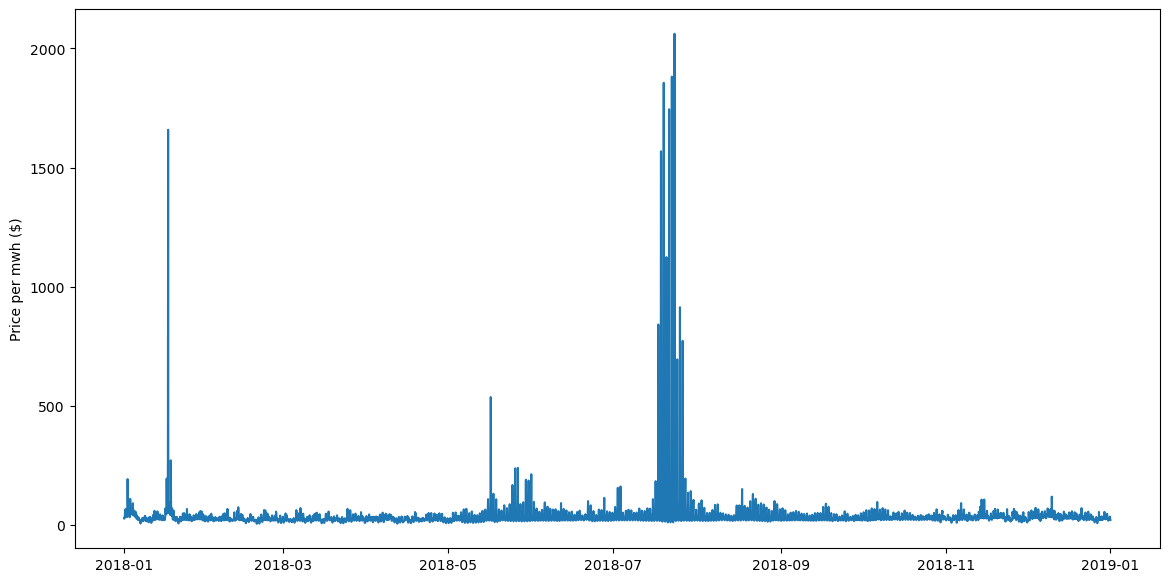

In [366]:
#Plot energy prices
plt.figure(figsize=(14, 7))
plt.plot(df.price_mwh)
plt.ylabel("Price per mwh ($)")

Total price savings from peak shaving: $1,440,142,839


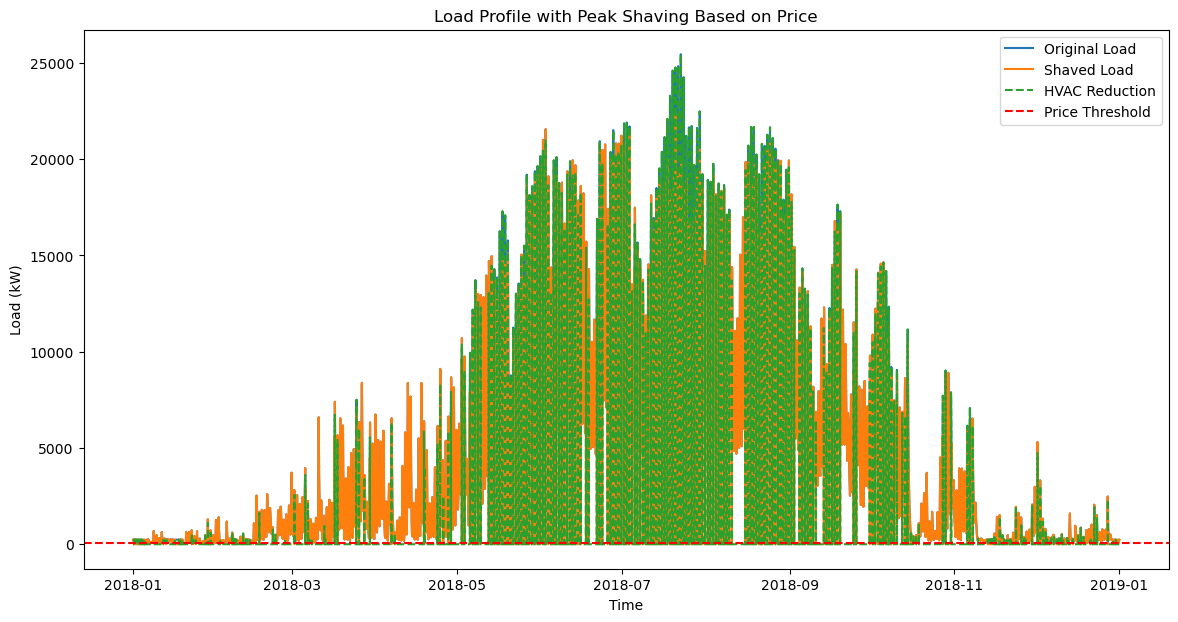

In [369]:
# Parameters for the HVAC portfolio
hvac_capacity = 3.5*7049055  # Maximum capacity of an HVAC system times the number of homes
price_threshold = df['price_mwh'].quantile(0.9)  # Threshold for peak shaving based on price

# Peak shaving function based on price
def peak_shave_by_price(load, price, price_threshold, hvac_capacity):
    shaved_load = load.copy()
    hvac_reduction = np.minimum((price > price_threshold) * load, hvac_capacity)
    shaved_load -= hvac_reduction
    return shaved_load, hvac_reduction

# Apply peak shaving
df['shaved_load'], df['hvac_reduction'] = peak_shave_by_price(df['cool_mwh'], df['price_mwh'], price_threshold, hvac_capacity)

# Calculate the price savings
df['price_savings'] = df['hvac_reduction'] * df['price_mwh']

# Summarize total savings
total_savings = df['price_savings'].sum()
print(f'Total price savings from peak shaving: ${total_savings:,.0f}')
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['cool_mwh'], label='Original Load')
plt.plot(df.index, df['shaved_load'], label='Shaved Load')
plt.plot(df.index, df['hvac_reduction'], label='HVAC Reduction', linestyle='--')
plt.axhline(y=price_threshold, color='r', linestyle='--', label='Price Threshold')
plt.xlabel('Time')
plt.ylabel('Load (kW)')
plt.title('Load Profile with Peak Shaving Based on Price')
plt.legend()
plt.show()